In [1]:
import pandas as pd

In [24]:
data = pd.read_csv('E:\Gem-stone-price-prediction-End-to-End-MLpipeline\data\cubic_zirconia.csv')

In [25]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Information about Variables

Carat -> Carat weight of the cubic zirconia.

Cut ->  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair,Good,Very Good,Premium,Ideal.

Color ->  Colour of the cubic zirconia.With D being the best and J the worst.

Clarity ->  cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst,

FL= flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth ->  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table ->  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price ->  the Price of the cubic zirconia.

X -> Length of the cubic zirconia in mm.

Y ->  Width of the cubic zirconia in mm.

Z ->  Height of the cubic zirconia in mm.

In [26]:
data.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
15549,15550,0.53,Premium,E,SI1,62.2,56.0,5.22,5.16,3.23,1654
1850,1851,1.59,Very Good,I,SI2,61.6,57.0,7.51,7.56,4.64,7835
25000,25001,0.24,Very Good,D,VVS2,59.5,62.0,4.04,4.06,2.41,521
12902,12903,1.01,Good,G,VS2,58.9,61.0,6.46,6.55,3.83,5756
8860,8861,1.50,Premium,G,SI2,61.8,59.0,7.29,7.21,4.48,9072
10165,10166,1.00,Very Good,F,SI1,62.5,56.0,6.38,6.42,4.00,4643
3363,3364,1.03,Good,G,SI1,63.2,58.0,6.38,6.43,4.05,4679
8824,8825,0.32,Ideal,F,VVS1,61.9,56.0,4.41,4.44,2.74,895
701,702,0.91,Good,G,SI2,63.6,56.0,6.14,6.09,3.89,3610
10195,10196,1.24,Ideal,J,VS2,61.8,58.0,6.88,6.84,4.24,5361


In [5]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [6]:
data.shape

(26967, 11)

In [27]:
data.dropna(axis=0,inplace=True)

In [28]:
data.shape

(26270, 11)

In [29]:
data.nunique()

Unnamed: 0    26270
carat           256
cut               5
color             7
clarity           8
depth           169
table           112
x               530
y               525
z               354
price          8629
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26270 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26270 non-null  int64  
 1   carat       26270 non-null  float64
 2   cut         26270 non-null  object 
 3   color       26270 non-null  object 
 4   clarity     26270 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26270 non-null  float64
 7   x           26270 non-null  float64
 8   y           26270 non-null  float64
 9   z           26270 non-null  float64
 10  price       26270 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.4+ MB


In [33]:
data = data.drop('Unnamed: 0',axis=1)

In [35]:
cat_columns = data.columns[data.dtypes=='object']

In [36]:
num_columns = data.columns[data.dtypes!='object']

In [13]:
data[cat_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [37]:
data[num_columns]

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


In [38]:
data[num_columns].describe()

,carat,depth,table,x,y,z,price
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,0.797995,61.745147,57.456011,5.729167,5.732967,3.536636,3937.973734
std,0.477214,1.412860,2.230776,1.127515,1.166330,0.699335,4022.189341
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5361.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


In [17]:
for col in cat_columns:
    print(data[col].value_counts())

cut
Ideal        10546
Premium       6707
Very Good     5878
Good          2382
Fair           757
Name: count, dtype: int64
color
G    5529
E    4793
F    4612
H    3991
D    3268
I    2676
J    1401
Name: count, dtype: int64
clarity
SI1     6408
VS2     5925
SI2     4447
VS1     3991
VVS2    2479
VVS1    1791
IF       874
I1       355
Name: count, dtype: int64


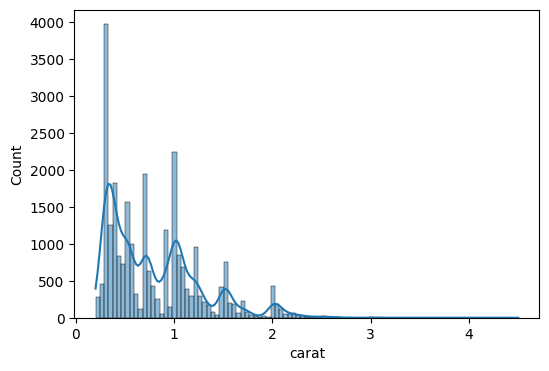

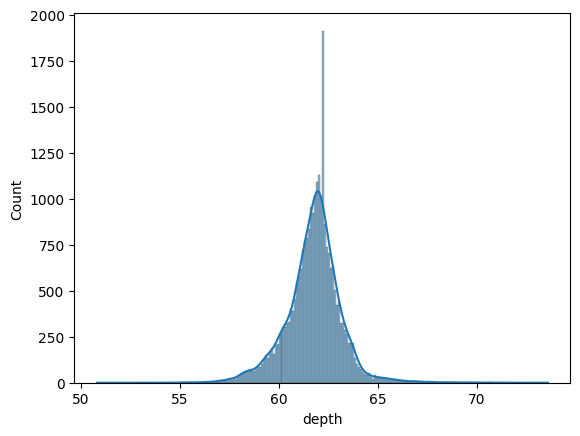

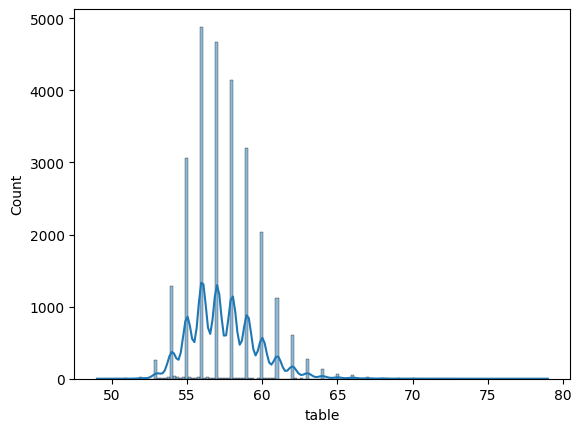

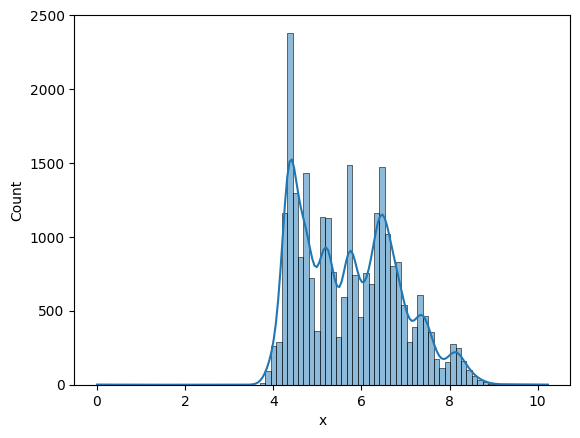

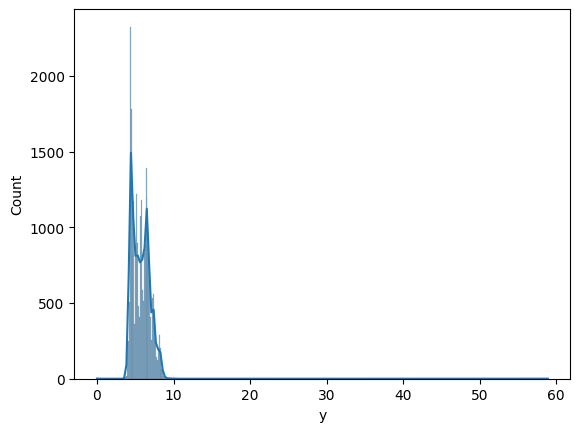

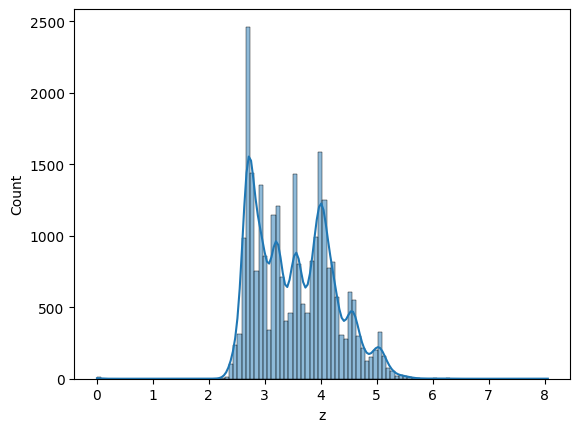

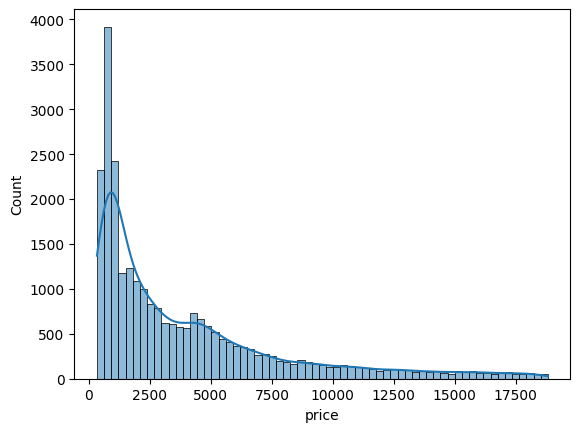

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=data,x=col,kde=True)
    print('\n')
    plt.show()

<Axes: >

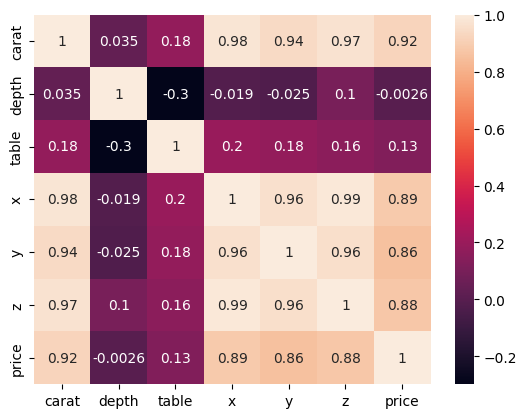

In [41]:
sns.heatmap(data[num_columns].corr(),annot=True)

Price is highly correlated with price and x,y,z dimensions

In [42]:
#ordinal encoding for cat_columns
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [43]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"] =  data["clarity"].map(clarity_map)
data["color"] = data["color"].map(color_map)

In [45]:
data.sample(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
24247,0.28,3,2,8,59.6,55.0,4.24,4.31,2.55,688
18342,0.51,3,2,5,60.4,59.0,5.16,5.20,3.13,1697
485,1.52,4,2,3,62.5,59.0,7.33,7.26,4.56,12418
5515,1.01,4,3,5,62.6,58.0,6.48,6.37,4.02,6176
5019,0.55,5,4,5,61.3,57.0,5.28,5.25,3.23,1792
17045,0.44,5,4,3,61.7,55.0,4.88,4.91,3.02,1032
8907,0.36,5,3,5,61.9,56.0,4.59,4.56,2.83,1013
5918,1.51,4,6,2,62.6,59.0,7.31,7.28,4.57,7292
1108,1.01,4,4,5,62.6,59.0,6.38,6.46,4.02,6499
8442,0.92,3,3,3,62.9,56.0,6.20,6.24,3.91,4037


In [46]:
from sklearn.impute import SimpleImputer #Handling missing values
from sklearn.preprocessing import StandardScaler #Handling Feature scaling
from sklearn.preprocessing import OrdinalEncoder # ordinal Encoding
#pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # compose all the stages for data preprocessing

stages Composed
data ingestion
EDA
Preprocessing
Model Building
Model Evaluation


In [49]:
X = data.drop('price',axis=1)
y=data['price']